<a href="https://colab.research.google.com/github/samharsh02/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset='/content/drive/MyDrive/DATASETS/training.1600000.processed.noemoticon.csv'

In [ ]:
import numpy as np
import pandas as pd
import re   #regular expression lib
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#STOPWORDS- The words that are not significant in the classification problem of sentiment analysis.

They have high frequency and low information content. Articles, pronouns, prepositions, conjunctions, common verbs.


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df=pd.read_csv(dataset, encoding='ISO-8859-1')    #encoding-latin-1 = Character encoding is a way of representing characters in a computer's memory and on storage media, and different encodings may represent the same characters differently.


In [ ]:
df.shape


(1599999, 6)

In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
column_names=['target','id','date','flag','user','text']  #naming the columns and reading the dataset again

In [ ]:


df=pd.read_csv(dataset,names=column_names, encoding='ISO-8859-1') #the column names are also read now.

In [ ]:
df.head() #ab sahi hogya dataset

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

CHECK MISSING VALUES

In [ ]:
df.isnull().sum() #no missing values here

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df['target'].value_counts() #the data is equally distributed.     upsampling/downsampling required otherwise.

0    800000
4    800000
Name: target, dtype: int64

0-negative and 4-positive
so we convert 4 to 1

In [ ]:
df.replace({'target':{4:1}}, inplace=True)  #inplace= True means the changes will be stored in the original dataset

In [ ]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

#STEMMING
reducing a word to its root word. ( har word ko krna pdega)

actor/actress/acting iska root act hai.

PorterStemmer in NLTK Library


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):   #content = text column
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)  #converting all the characters that are not a-z/A-Z to space in content
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()  #store in list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #stemming
  stemmed_content =' '.join(stemmed_content) # upar split kia tha wapas join krdia

  return stemmed_content

In [ ]:
#for i in df['text']:
 # df['stemmed_content']= stemming(i)
df['stemmed_content'] = df['text'].apply(stemming)

In [ ]:
#train_test_split
X= df['stemmed_content'].values
Y=df['target'].values

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2) #stratify for equal proportion of Y in train and test  , random state to aisehi bs

In [ ]:
X_train.shape

(1280000,)

In [ ]:
X_test.shape

(320000,)

#Vectorizer
convert text to numerical values

In [ ]:
vectorizer= TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train) #learn parameters only here
X_test=vectorizer.transform(X_test)  #dont fit_transform here , varna overfitting


#Training the MODELS

In [ ]:
algorithm = ['KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','LogisticRegression', 'SVC' ]
Accuracy=[]

In [ ]:
def all(model):
  #train the model
  model.fit(X_train,Y_train)
  #predict values
  pred=model.predict(X_test)
  #find accuracy
  acc = accuracy_score(Y_test,pred)
  Accuracy.append(acc)


  #cm
  cm = confusion_matrix(Y_test,pred)
  #plot
  sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
  plt.title('Confusion matrix')
  plt.xlabel('Predicted lablel')
  plt.ylabel('True lable')
  plt.show()


  #normalize the cm
  cm1=confusion_matrix(Y_test,pred, normalize='true')
  sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
  plt.title('Normalised Confusion matrix')
  plt.xlabel('Predicted values')
  plt.ylabel('Actual values')
  plt.show()


  #printing
  print(cm1)
  print(classification_report(Y_test,pred))
  print('accuracy score', acc)



KNN:
Default neighbours=5, default distance metric is Minkowski

In [ ]:
model_1 =KNeighborsClassifier(n_neighbors=2)
all(model_1)

In [ ]:
model_2= RandomForestClassifier(n_estimators=100,random_state=0)
all(model_2)

In [ ]:
model_3= DecisionTreeClassifier(random_state=42)
all(model_3)

In [ ]:
model_4= GaussianNB()
all(model_4)

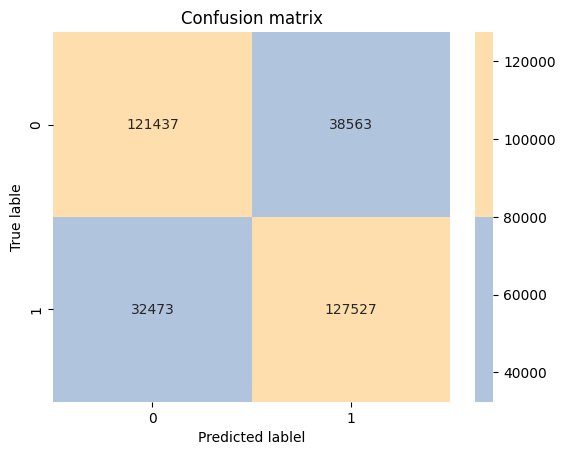

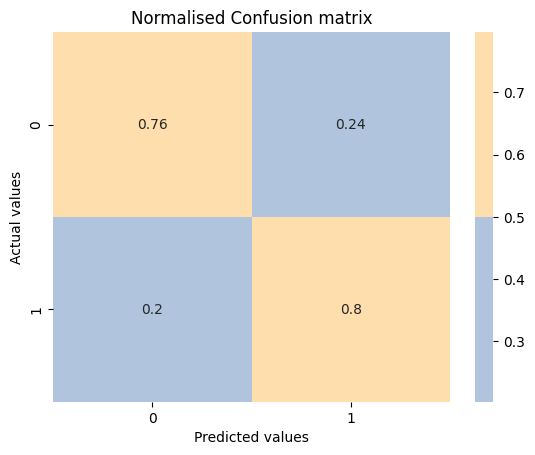

[[0.75898125 0.24101875]
 [0.20295625 0.79704375]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

accuracy score 0.7780125


In [ ]:
model_5= LogisticRegression(max_iter=1000)
all(model_5)

[0.7780125]
